<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://www.univ-tlse3.fr/" ><img src="http://www.univ-tlse3.fr/medias/photo/ut3pres_logoq_1372757033342.jpg?ID_FICHE=49702" style="float:right; max-width: 250px; display: inline" alt="INSA"/></a> 
</center>

# *[Machine Learning Tutorial](https://github.com/wikistat/MLTraining): Elementary Image Recognition*

## Reconnaissance de chiffres manuscrits ([MNIST](http://yann.lecun.com/exdb/mnist/)) 
## Utilisation des librairies <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>  de <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> et <a href="https://keras.io/"><img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" style="max-width: 100px; display: inline" alt="Keras"/></a> 

### Résumé
Reconnaissance d'images appliquée à la base des chiffres manuscrits [MNIST](http://yann.lecun.com/exdb/mnist/). Les données sont analysées pour illustrer les principales étapes communes en *science des données* et appliquables à des images élémentaires monochromes. Exploration ([analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [analyse factorielle discriminante](http://wikistat.fr/pdf/st-m-explo-acp.pdf)) des images vectorisées; reconnaissance des caractères par différents algorithmes d'apprentissage: [k plus proches voisins](http://wikistat.fr/pdf/st-m-app-add.pdf), [random forest](http://wikistat.fr/pdf/st-m-app-agreg.pdf). Amélioration de cette reconnaissance en utilisant un [réseau convolutionnel](http://wikistat.fr/pdf/st-m-app-rn.pdf) (*deep learning*). 

## 1 Introduction
### 1.1 Objectif
Le site [*MNIST DATABASE of handwritten digits*](http://yann.lecun.com/exdb/mnist/) maintenu de 1998 à 2012 par Yan le Cun retrace l'historique des méthodes utilisées pour la reconnaissance d'images représentant des caractères manuscrits. Il liste toutes les publications et donc les méthodes d'apprentissage successivement testées du perceptron élémentaire à une couche jusqu'à l'arrivée de l'apprentissage profond en passant par les $k$ plus proches voisins, le boosting, les SVM... et toute sorte de réseaux neuronaux. Comme de façon plus générale en reconnaissance d'images, c'est l'introduction de couches convolutionnelles (*ConvNet*) dans un réseau qui a permis un saut très significatif dans la réduction de l'erreur de reconnaissance: de 12% à moins de 1%. 

De très nombreuses stratégies ont été testées dont certaines cherchant à utiliser des distances spécifiques (tangeantielles) entre les images afin d'introduire des propritétes indispensables d'invariance par certains groupes de transformation dont la translation.

C'est justement cette propriété inhérentes aux couches de convolution qui conduit à des résultats pertinents. 
### 1.2 Environnement logiciel
Pour être exécuté, ce calepin (*jupyter notebook*) nécessite l'installation de Python3 via par exemple le site  [Anaconda](https://conda.io/docs/user-guide/install/download.html). Les algorihtmes d'exploration et d'apprentissage statistiques utilisés sont disponibles dans la librairie [`Scikit-learn`](http://scikit-learn.org/stable/) tandis qu'une approche élémentaire de l'apprentissage profond des réseaux de neurones avec couche convolutionnelle nécessite l'installation de la librairie [`Keras`](https://keras.io/) qui entraine celle de [`TensorFlow`](https://www.tensorflow.org/). 

*Remarques*: 
- ce calepin a été construit et testé sous Ubuntu Mate 16.04 (Python 3.6) mais son utilisation sous Windows ou Mac OS ne devrait pas poser de problème une fois l'environnement correctement installé;
- la commande `conda` installe sans difficulté l'environnement `Keras` en incluant `TensorFlow`;
- les réseaux de neurones considérés restent de structure simple, une carte GPU n'est pas indispensable mais serait recommandée. Elle est indispensbale si l'utilisateur souhaite approfonfir les optimisations et aborder des réseaux plus complexes présentés dans la littérature ou les sites dédiés à l'étude de ces données.

# <FONT COLOR="Red">Episode 1</font>

## 2 Prise en compte des données
### 1.2 Lecture des données d'apprentissage et de test
Les données peuvent être préalablement téléchargées ou directement lues. Ce sont celles originales du site [MNIST DataBase](http://yann.lecun.com/exdb/mnist/) mais préalablement converties au format .csv, certes plus volumineux mais plus facile à lire. Attention le fichier `mnist_train.zip` présent dans le dépôt est compressé. 

Principales librairies.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Lecture des données d'apprentissage dérectement dans l'archive compressée.

In [2]:
path=""
Dtrain=pd.read_csv(path+"mnist_train.csv.zip",header=None)
Dtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [3]:
# Extraction puis suppression de la dernière colonne des labels
Ltrain=Dtrain.iloc[:,784]
Dtrain.drop(Dtrain.columns[[784]], axis=1,inplace=True)
Dtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Dimensions de l'échantillon
Dtrain.shape

(60000, 784)

Même chose pour les données de l'échantillon test.

In [5]:
Dtest=pd.read_csv(path+"mnist_test.csv.zip",header=None)
Ltest=Dtest.iloc[:,784]
Dtest.drop(Dtest.columns[[784]], axis=1,inplace=True)
Dtest.shape

(10000, 784)

### 2.2 Visualisation élémentaire

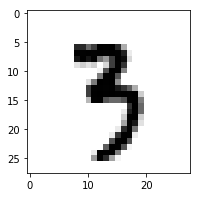

In [6]:
# affichage d'un chiffre
plt.figure(1, figsize=(3, 3))
plt.imshow(np.matrix(Dtest.iloc[1,:]).reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

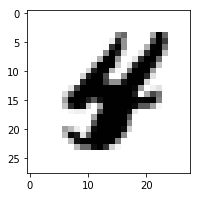

In [7]:
plt.figure(1, figsize=(3, 3))
plt.imshow(np.matrix(Dtest.iloc[10,:]).reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## 3 Exploration
### 3.1 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)

Les données ont déjà été normalisées centrées et sont complètes. Elles ne nécessitent pas d'autre "nettoyage" au moins rudimentaire.

In [8]:
digitDic = {0 : "0",1 : "1",2: "2",3: "3",4: "4",5:"5",6:"6",7:"7",8:"8",9:"9"}
labels = digitDic.values()

In [9]:
def plot_pca(X_R,fig,ax,nbc,nbc2):
    for i in range(10):
        xs = X_R[Ltrain==i+1,nbc-1]
        ys = X_R[Ltrain==i+1, nbc2-1]
        label = digitDic [i]
        color = cmaps(i)
        ax.scatter(xs, ys, color=color, alpha=.8, s=1, label=label)
        ax.set_xlabel("PC%d : %.2f %%" %(nbc,pca.explained_variance_ratio_[nbc-1]*100), fontsize=10)
        ax.set_ylabel("PC%d : %.2f %%" %(nbc2,pca.explained_variance_ratio_[nbc2-1]*100), fontsize=10)

In [10]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
X_c = pca.fit_transform(Dtrain)

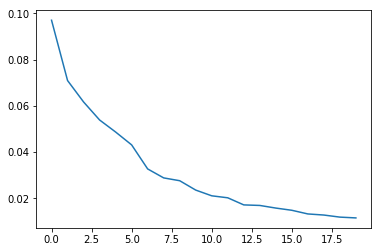

In [12]:
plt.plot(pca.explained_variance_ratio_[0:20])
plt.show()

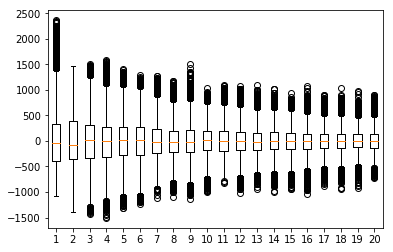

In [13]:
plt.boxplot(X_c[:,0:20])
plt.show()

**Q** Un choix de dimension s'impose-t-il?

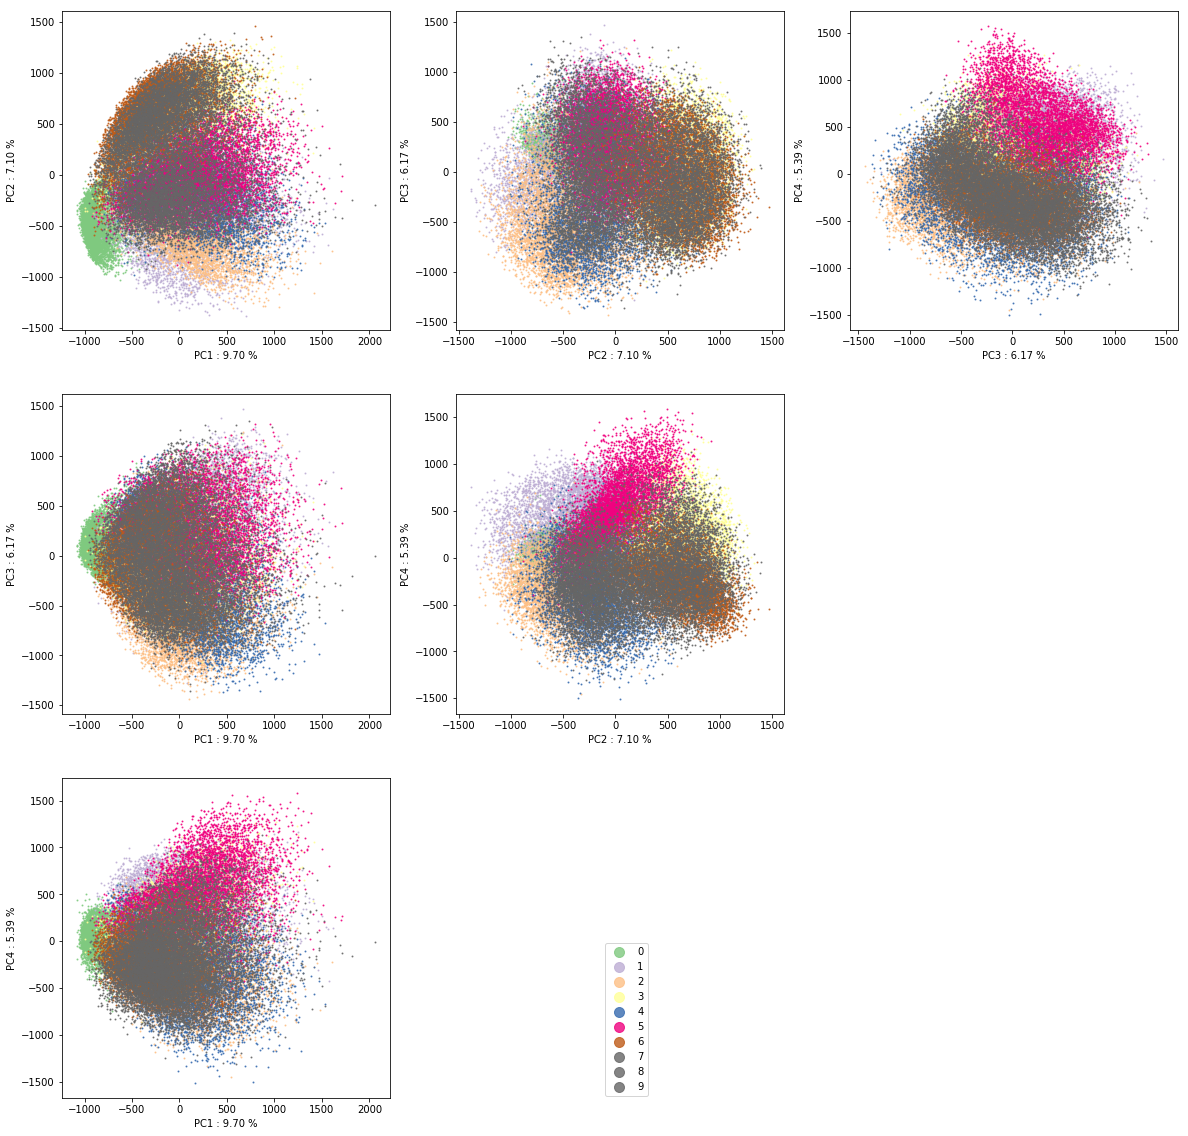

In [14]:
cmaps = plt.get_cmap("Accent")
fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(X_c, fig,ax,nbc,nbc2)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=10)
plt.show()

**Q** La discrimination des caractères semble-t-elle facile en considérant la distance euclidienne usuelle entre les images?

### 3.2 [Analyse factorielle discriminante](http://wikistat.fr/pdf/st-m-explo-afd.pdf)

Les labels des images sont connus dans ce cadre de classificaiton supervisée. 

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
method = LinearDiscriminantAnalysis() 
lda=method.fit(Dtrain,Ltrain)
X_r2=lda.transform(Dtrain)

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


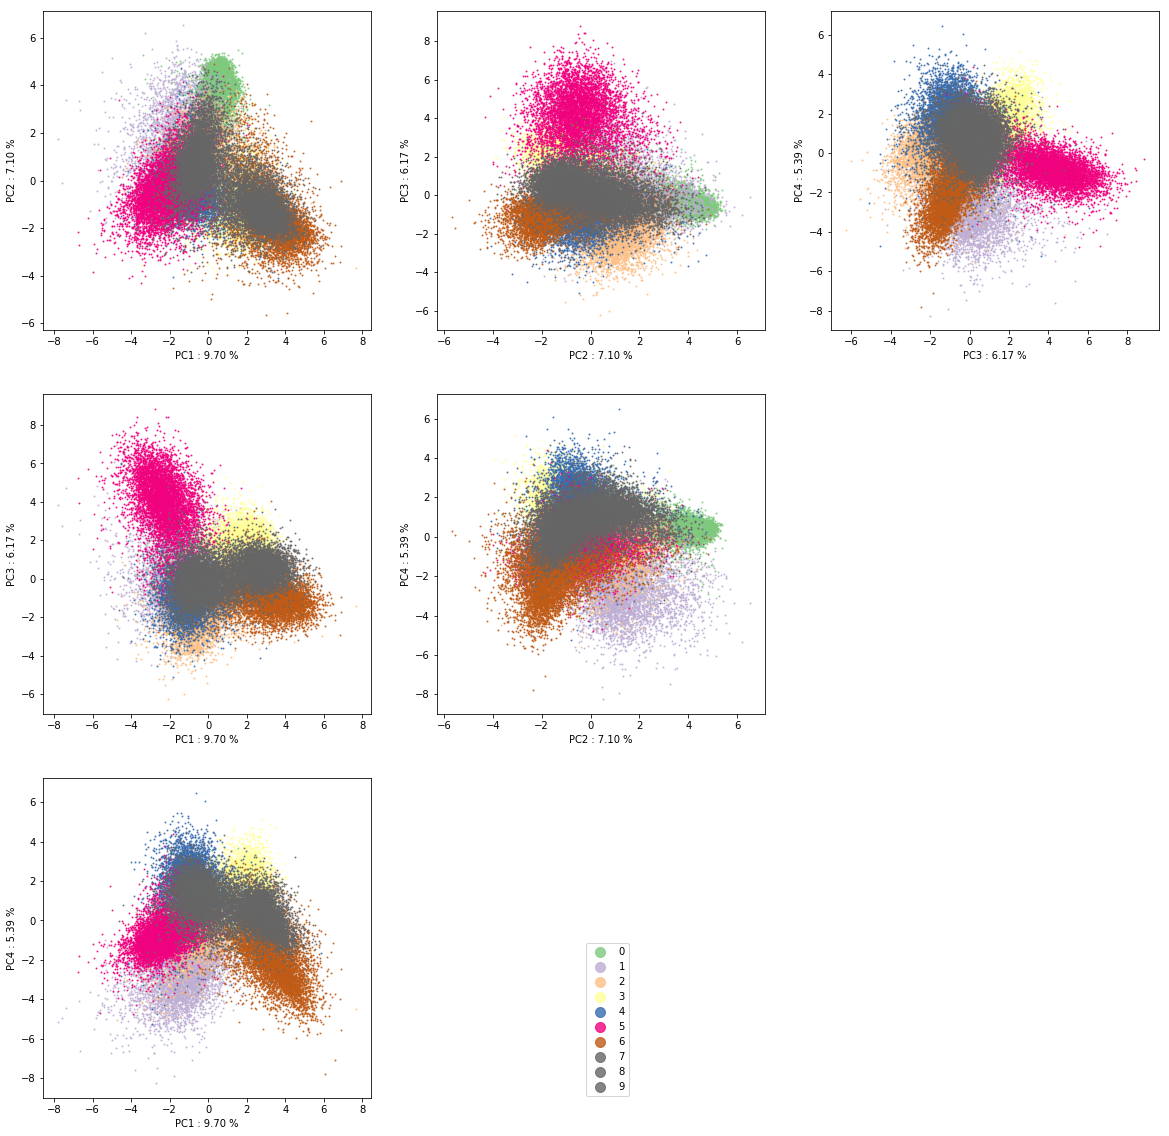

In [16]:
fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(X_r2, fig,ax,nbc,nbc2)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=10)
plt.show()

**Q** Des sépatrations linéaires des classes semblent elles possibles? 

### 3.2 [Classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf)
Cette étape n'est pas très utile mais elle permet d'illustrer l'utilisaiton de $k$-means sur un jeu de données plus important.

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
tps1 = time.clock()
km=KMeans(n_clusters=10,init='k-means++', 
   n_init=10, max_iter=100, tol=0.01,
   precompute_distances=True, verbose=0, 
   random_state=None, copy_x=True, n_jobs=-1)
km.fit(Dtrain)
tps2 = time.clock()
print("Temps execution Kmeans :", (tps2 - tps1)/60)

Temps execution Kmeans : 0.023245166666666723


In [18]:
cm = confusion_matrix(Ltrain, km.labels_)
print(cm)

[[   3   21  177  162 2811   38 2499   15  180   17]
 [3717 2978   10    5    0    6    0    9    8    9]
 [ 365  352  159  326   11  174  100   70  211 4190]
 [ 429  102 1036 3923   15  175  127   50   57  217]
 [ 159  308   20    1   10 3189   11 1944  161   39]
 [ 168  792 1472 1778   62  377  276  360  121   15]
 [ 273  221   91   29   99   82  122    1 4913   87]
 [ 327  281   10    5   15 1796   14 3774    4   39]
 [ 297  416 3456 1138   38  193   32  180   47   54]
 [ 240  115   69   85   37 2902   19 2461    8   13]]


**Q** Les classes sont-elles bien regroupées?

# <FONT COLOR="Red">Episode 2</font>

## 4 Algorithmes d'apprentissage élémentaires
### 4.1  [$K$ nearest neighboors](http://wikistat.fr/pdf/st-m-app-add.pdf)

In [ ]:
# Définition du modèle avec un nombre k "standard" de voisins
from sklearn.neighbors import KNeighborsClassifier
tps1 = time.clock()
knn = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
digit_knn=knn.fit(Dtrain, Ltrain) 
tps2 = time.clock()
print("Temps de k-nn :",(tps2 - tps1)/60)

Temps de k-nn : 0.4110284500000001


In [ ]:
# Apprentissage et estimation de l'erreur de prévision sur l'échantillon test
tps1 = time.clock()
erreur=1-digit_knn.score(Dtest,Ltest)
tps2 = time.clock()
print("Temps:",(tps2 - tps1)/60,"Erreur:",erreur)

Temps: 19.562478383333332 Erreur: 0.033499999999999974


Il faudrait ré-appliquer la procédure d'otpimisation de $k$ par validation croisée décrite dans le [tutoriel](http://wikistat.fr/pdf/st-tutor3-python-scikit.pdf) d'introduction à scikit-learn. Néanmoins la solution $k=10$ est raisonnable et on retrouve une performance classique sur ce type de données: 3.3%, pour une méthode utilisée sans raffinement. 

C'est en effet une autre distance qu'il faudrait utiliser avec les $k$ plus proches voisins pour améliorer sensiblement les résultats mais avec un coût beaucoup plus élevé en temps de calcul. [Simard et al. (1998)](https://hal-ens.archives-ouvertes.fr/file/index/docid/60948/filename/Tangent_distance.pdf) proposent ainsi le calcul d'une distance tangentielle à une variété entre les images. 

### 4.2 [Random forest](http://wikistat.fr/pdf/st-m-app-agreg.pdf)

Les forêts aléatoires sont également une approche raisonnable, à moindre coût de développement, sur ces données. Analyser en détail la liste des paramètres proposés dans l'implémentation de cet algorithme. Consulter pour ce faire la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en ligne.

Les valeurs par défaut des paramètres sont utilisées sauf pour le nombre d'arbres: 100 au lieu de 10, et le nombre de processeurs utilisés: -1 au lieu de 1 (tous sont utilisés sauf 1 pour le système). Attention, tous les paramètres disponibles ne sont pas listés.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
tps0 = time.clock()
rf = RandomForestClassifier(n_estimators=100, 
   criterion='gini', max_depth=None, min_samples_split=2, 
   min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
   bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
rf.fit(Dtrain,Ltrain)
tps1 = time.clock()
print("Temps de configutration RF :" ,tps1 - tps0)

Temps de configutration RF : 71.18671300000005


In [ ]:
# erreur out-of-bag
erreur_oob=1-rf.oob_score_
tps2 = time.clock()
print("Temps execution RF :", tps2 - tps0, "Erreur oob:", erreur_oob)


Temps execution RF : 71.19291199999998 Erreur oob: 0.03478333333333339


In [ ]:
# erreur sur l'échantillon test
1-rf.score(Dtest,Ltest)

0.030200000000000005

In [ ]:
cm = confusion_matrix(Ltest, rf.predict(Dtest))
print(cm)

[[ 968    0    2    0    0    1    3    1    4    1]
 [   0 1125    2    2    1    1    3    0    1    0]
 [   8    0  998    4    3    0    4    8    7    0]
 [   1    0   11  974    0    6    0    9    6    3]
 [   1    0    2    0  957    0    4    0    2   16]
 [   4    1    2   10    3  858    5    2    6    1]
 [   5    3    0    0    4    3  939    0    4    0]
 [   1    3   20    1    2    0    0  987    3   11]
 [   4    0    4    8    4    5    5    3  929   12]
 [   5    5    2    9   11    2    1    5    6  963]]


Comme pour les $k$ plus proches voisins, il serait utile d'optimiser certains paramètres dont le nombre d'arbres et sans doute *max_features*. L'optimisation de l'erreur *out-of-bag* plutôt qu'une procédure lourde  de validaiton croisée serait bienvenue. D'autre part, la restriction de la profondeur max des arbres pourrait réduire sensiblement les temps de calcul mais cela ne semble pas nécessaire d'autant que c'est un paramètre critique pour la qualité de la prévision.


# <FONT COLOR="Red">Episode 3</font>

### 4.3  [Réseau de neurones](http://wikistat.fr/pdf/st-m-app-rn.pdf) (perceptron)
La librairie Keras est utilisée pour construire un réseau de neurones de type perceptron avec deux couches cachées séparée par des couches `dropout` pour simplifier la structure du réseau. 

In [ ]:
import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

Using TensorFlow backend.


La normalisation des données entre 0 et 1 est importante.

In [ ]:
N_classes = 10
X_train = Dtrain
Y_train = Ltrain
X_test = Dtest
Y_test = Ltest
Y_train_cat = ku.to_categorical(Y_train, N_classes)
Y_test_cat = ku.to_categorical(Y_test, N_classes)
X_train_norm = X_train/255
X_test_norm = X_test/255

Construction du réseau.

In [ ]:
batch_size = 128
epochs = 20

model = km.Sequential()
model.add(kl.Dense(512, activation='relu', input_shape=(784,)))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(512, activation='relu'))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(N_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Apprentissage du réseau. Attention c'est un peu long... une carte GPU devient nécessaire.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=ko.RMSprop(),
              metrics=['accuracy'])
ts=time.time()
history = model.fit(X_train_norm, Y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_norm, Y_test_cat))
te=time.time()
t_train_mpl_norm = te-ts

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.3000 - acc: 0.9074 - val_loss: 0.1313 - val_acc: 0.9599
Epoch 2/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.1219 - acc: 0.9627 - val_loss: 0.1058 - val_acc: 0.9677
Epoch 3/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.0930 - acc: 0.9730 - val_loss: 0.0931 - val_acc: 0.9715
Epoch 4/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.0727 - acc: 0.9781 - val_loss: 0.0892 - val_acc: 0.9735
Epoch 5/20
60000/60000 [==============================] - 13s 222us/step - loss: 0.0658 - acc: 0.9805 - val_loss: 0.1020 - val_acc: 0.9734
Epoch 6/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.0593 - acc: 0.9827 - val_loss: 0.0865 - val_acc: 0.9789
Epoch 7/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.0554 - acc: 0.9838 - val_loss: 0.

In [ ]:
score_mpl_norm = model.evaluate(X_test, Y_test_cat, verbose=0)
predict_mpl_norm = model.predict(X_test)
print('Test loss:', score_mpl_norm[0])
print('Test error:', 100*(1-score_mpl_norm[1]),'%')
print("Time Running: %.2f seconds" %t_train_mpl_norm )
pd.DataFrame(confusion_matrix(Y_test, predict_mpl_norm.argmax(1)))

Test loss: 0.28619307260513305
Test error: 1.7800000000000038 %
Time Running: 281.47 seconds


,0,1,2,3,4,5,6,7,8,9
0,971,0,0,1,1,0,2,1,3,1
1,0,1127,2,0,0,0,2,1,3,0
2,0,2,1008,2,2,0,1,5,12,0
3,0,0,2,993,0,2,0,3,6,4
4,0,1,4,0,959,0,3,1,1,13
5,2,1,0,9,1,865,4,2,5,3
6,2,3,0,1,7,4,937,0,4,0
7,0,4,5,0,0,0,0,1006,3,10
8,0,0,2,3,3,0,0,3,959,4
9,0,2,0,2,5,0,0,2,1,997


## 5 *Convolutional Network*
Les propriété d'invariance par translation introduites par les couches opérant une convolution des images ont un impact important sur la qualité des résultats.
### 5.1 Réseau
Test d'un réseau de convolution constitué de 7 couches: 

* Une couche de convolution 2D, avec fenêtre de taille 3x3 et une fonction d'activation *relu*
* Une couche de convolution 2D, avec fenêtre de taille 3x3 et une fonction d'activation *relu*
* Une couche max pooling de fenêtre 2x2
* Une couche *dropout* où 25% des neurones sont desactivés
* Une couche *Flatten* transforme les images $N \times N$ en vecteurs $N^2$.
* Une couche classique de 128 neurones
* Une couche dropout ou 50% des neurones sont desactivés

Une couche *softmax* fournit la classification

### 5.2 Format des données

Dans les exemples précédents. Les données était "applaties". Une imade de $28\times 28=784$ pixels est considérée comme un vecteur. 

Pour pouvoir utiliser le principe de la convolution la structure des images est conservée. Une image n'est pas un vecteur de tailles $784\times 1$ mais une matrice de taille $28\times 28$. Ainsi `X_train` est réorganisée en cube ou multitableau de dimensions $60000\times 28\times 28$ pour être utilisé dans un réseau de convolution.

Avec **Keras** `X_train` doit même être de dimensions $60000\times 28\times 28\times 1$. La dernière dimension, de taille 1 peut paraitre inutile car dans le cas des données *MNIST* les pixels ne sont décrits qu'avec un seul niveau de gris. Cependant, des images couleurs en RGB sont généralement codées avec trois niveaux d'intensité (Rouge, Vert et Bleus) correspondant à la quatrième dimension comportant 3 valeurs. 

Noter également que l'utilisation des couches de convolution rend inutile la normalisation préalable des données.

In [ ]:
X_train_conv = X_train.values.reshape(60000, 28, 28, 1)
X_test_conv = X_test.values.reshape(10000, 28, 28, 1)

### 5.3 Définition du réseau

In [ ]:
# descrition du réseau
model = km.Sequential()
model.add(kl.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28, 1), data_format="channels_last"))
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(N_classes, activation='softmax'))
# Résumé
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

### 5.3 Apprentissage
Prendre patience... une carte GPU devient indispensable...

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])
ts=time.time()
model.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))
te=time.time()
t_train_conv = te-ts

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.8888 - acc: 0.8878 - val_loss: 0.0680 - val_acc: 0.9787
Epoch 2/20
60000/60000 [==============================] - 90s 2ms/step - loss: 0.1205 - acc: 0.9664 - val_loss: 0.0490 - val_acc: 0.9841
Epoch 3/20
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0890 - acc: 0.9741 - val_loss: 0.0475 - val_acc: 0.9855
Epoch 4/20
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0705 - acc: 0.9803 - val_loss: 0.0430 - val_acc: 0.9875
Epoch 5/20
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0602 - acc: 0.9826 - val_loss: 0.0376 - val_acc: 0.9876
Epoch 6/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0524 - acc: 0.9850 - val_loss: 0.0390 - val_acc: 0.9884
Epoch 7/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0498 - acc: 0.9854 - val_loss: 0.0366 - val_acc

### 5.4 Résultat et perspectives

In [ ]:
score_conv = model.evaluate(X_test_conv, Y_test_cat, verbose=0)
predict_conv = model.predict(X_test_conv)
print('Test loss:', score_conv[0])
print('Test error:', 100*(1-score_conv[1]),'%')
print("Time Running: %.2f seconds" %t_train_conv )
pd.DataFrame(confusion_matrix(Y_test, predict_conv.argmax(1)))

**Remarques**
- Un réseau plus complexe et/ou un enrichissmenet de la base d'apprentissage par petites translations / rotations des images permet de réduire encore l'erreur de prévision à condition de disposer de moyens de calcul suffisants.
- D'autres tutoriels sont disponibles sur internet et en particulier dans le dépôt [Wikistat](https://github.com/wikistat). Un [calepin](https://github.com/wikistat/Ateliers-Big-Data/blob/master/6-DeepLearning/Atelier-CatsVSDogs-Keras.ipynb) est consacré à la distinction des chiens et chats en comparant plusieurs architectures de réseau et stratégies d'apprentissage. Il est notamment recommandé, pour gagner beaucoup de temps, de réutiliser un réseau déjà entrainé comme [imagenet](http://www.image-net.org/) sur des données similaires puis d'apprendre seulement la dernière couche dense du réseau sur ses propres données.